<a href="https://colab.research.google.com/github/arnaudstdr/films_reco/blob/main/Films_recommandations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Système de recommandations de Films
Développement d'un système de recommandation de films basé sur l'analyse du contenu utilisant le Natural Language Processing (NLP) et des algorithmes de similarité vectorielle.

## Sommaire

- [Importation des outils](#1-importation-des-outils)
- [Chargement des données](#2-chargement-des-données)
- <a href="#preparation-donnees">Préparation des données</a>


## 1. Importation des outils



In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Chargement des données

Télécharger les données depuis https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJETS_ML/Films_recommandations/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJETS_ML/Films_recommandations/tmdb_5000_credits.csv')

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 3. <a id="preparation-donnees">Préparation des données</a>

In [4]:
# Modification de la colonne 'movie_id' de credits en 'id' pour faciliter la fusion
credits.rename(columns={'movie_id': 'id'}, inplace=True)

credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Fusion des deux DataFrames
La fusion des deux dataframes facilite l'analyse et la création du modèle :
- Toutes les informations nécessaire sont disponible dans un seul DataFrame.
- Permet de manipuler les données plus efficacement et d'extraire les caractéristiques pertinentes.

In [5]:
# Fusion des DataFrames
movies_data = movies.merge(credits, on='id')

movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- Les deux DataFrames contiennent une colones `title`, alors lors de la fusion Pandas ajoute des suffixes `_x` et `_y` pour éviter les conflits.
- Comme les colonnes `title_x` et `title_y` sont identiques, nous allons n'en garder qu'un seul.  

In [6]:
movies_data = movies_data.drop(columns=['title_y'])
movies_data.rename(columns={'title_x': 'title'}, inplace=True)

movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# Sélection des caractéristiques pertinentes
features = ['title', 'overview', 'genres', 'keywords', 'cast', 'crew']
movies_features = movies_data[features]

**Le nettoyage des valeurs NaN (valeurs manquantes)** est une étape essentielle pour éviter les erreurs et garantir. Pourquoi ?
1. Éviter les erreurs lors des calculs
  - `TfidfVectorizer` ou `cosine_similarity` exigent des entrées complètes.
2. Améliorer la qualité des recommandations
  - Une ligne contenant des `Nan` peut fausser les prédictions.
3. Préparer les données pour l'entraînement du modèle

In [8]:
# Nettoyage des données NaN
movies_features = movies_features.fillna('')

#### Conversion des colonnes JSON en chaînes de caractères
- Facilite l'analyse et la manipulation
- Rend compatible avec les algorithmes de NLP
- Permet un affichage plus simple et lisible

In [9]:
# Conversion des colonnes JSON en chaînes de caractères
import ast

def convert_json(obj):
  try:
    result = ast.literal_eval(obj)
    names = [item['name'] for item in result]
    return ' '.join(names)
  except:
    return ''

movies_features['genres'] = movies_features['genres'].apply(convert_json)
movies_features['keywords'] = movies_features['keywords'].apply(convert_json)

In [10]:
# Pour les acteurs, on ne garde que les 3 premiers
def get_top_actors(cast_json):
  try:
    cast = ast.literal_eval(cast_json)
    top_cast = [actor['name'] for actor in cast[:3]]
    return ' '.join(top_cast)
  except:
    return ''

movies_features['cast'] = movies_features['cast'].apply(get_top_actors)

In [11]:
# Pour l'équipe, on ne garde que le réalisateur
def get_director(crew_json):
  try:
    crew = ast.literal_eval(crew_json)
    directors = [member['name'] for member in crew if member['job'] == 'Director']
    return ' '.join(directors)
  except:
    return ''

## 4. Création de la représentation vectorielle des films
Il est nécessaire de créer une représentation vectorielle pour :
- Transformer du texte en nombres pour que les algorithmes puissent l'utiliser
- Comparer les films entre eux grâce à la similarité cosinus
- Créer un moteur de recommandations

In [13]:
# Concaténation de toutes les caractéristiques
movies_features['combined_features'] = (
    movies_features['overview'] + ' ' +
    movies_features['genres'] + ' ' +
    movies_features['keywords'] + ' ' +
    movies_features['cast'] + ' ' +
    movies_features['crew']
)

In [17]:
# Vectorisation des caractéristiques avec TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_features['combined_features'])

## 5. Calcul de la simalarité

In [19]:
# Utilisation de la similarité cosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

## 6. Fonction de recommandation

In [20]:
def get_recommendations(title, cosine_sim=cosine_sim, movies_df=movies_features):
  # Vérifie si le film existe dans le base de données
  if title not in movies_df['title'].values:
    close_matches = movies_df[movies_df['title'].str.contains(title, case=False)]
    if not close_matches.empty:
      title = close_matches.iloc[0]['titel']
      print(f"Film introuvable. Utilisation de '{title}' à la place.")
    else:
      return "Film introuvable. Veuillez essayer un autre titre."

  # Récupération de l'index du film
  idx = movies_df[movies_df['title'] == title].index[0]

  # Création d'une liste de tuples (positions, score de similarité)
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Tri des films en fonction du score de similarité
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Top 10 des films similaires (en excluant le film lui-même)
  sim_scores = sim_scores[1:11]

  # Récupération des indices des films
  movie_indices = [i[0] for i in sim_scores]

  # Retourner les 10 films les plus similaires
  recommanded_movies = movies_df['title'].iloc[movie_indices]

  # Récupérer les scores pours visualisation
  similarity_scores = [i[1] for i in sim_scores]

  # Créer un DataFrame avec les recommandations et leurs scores
  recommandations = pd.DataFrame({
      'Film': recommanded_movies.values,
      'Score de similarité': similarity_scores
  })

  return recommandations

## 7. Visualisation

In [24]:
def plot_recommandations(recommandations):
  plt.figure(figsize=(10, 6))

  # Créer un graphique à barres horizontales
  sns.barplot(x='Score de similarité', y='Film', data=recommandations)

  plt.title('Films recommandés et leurs scores de similarité')
  plt.xlabel('Score de similarité')
  plt.ylabel('Films')
  plt.tight_layout()

  plt.savefig('recommandations_plot.png')
  plt.show()

## 8. Évaluation du sytème

In [29]:
def evaluate_system():
  # Sélectionner des films populaires l'évaluation
  popular_movies = movies_data.sort_values('popularity', ascending=False).head(10)['title'].values

  results = {}
  for movie in popular_movies:
    recommandations = get_recommendations(movie)
    if isinstance(recommandations, pd.DataFrame):
      # Calculer le score moyen de similarité
      avg_score = recommandations['Score de similarité'].mean()
      results[movie] = avg_score

  # Visualiser les résultats
  plt.figure(figsize=(12, 6))
  plt.bar(results.keys(), results.values())
  plt.xticks(rotation=45, ha='right')
  plt.title('Score moyen de similarité pour différents films populaires')
  plt.ylabel('Score moyen')
  plt.tight_layout()

  plt.savefig('evaluation_plot.png')
  plt.show()

  return results

                         Film  Score de similarité
0                  Iron Man 2             0.557884
1                  Iron Man 3             0.490724
2                     Ant-Man             0.489616
3  Captain America: Civil War             0.482610
4     Avengers: Age of Ultron             0.479609
5                        Hulk             0.476883
6                  Spider-Man             0.475593
7              Blade: Trinity             0.471839
8                Spider-Man 2             0.470907
9                The Avengers             0.469013


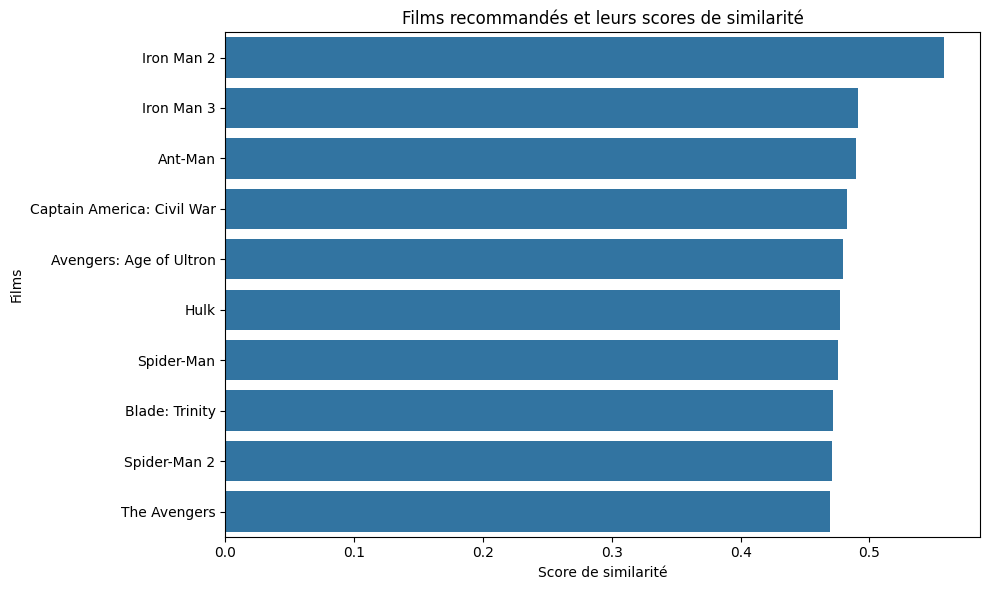

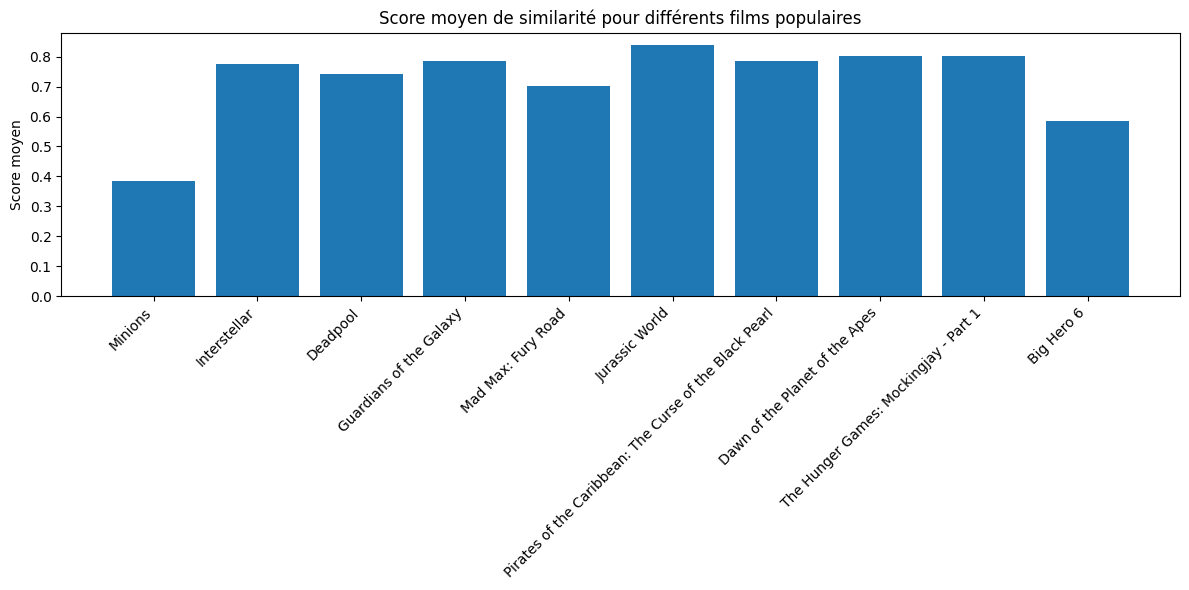


Résultats de l'évaluation :
Minions: 0.3861
Interstellar: 0.7761
Deadpool: 0.7431
Guardians of the Galaxy: 0.7843
Mad Max: Fury Road: 0.7027
Jurassic World: 0.8378
Pirates of the Caribbean: The Curse of the Black Pearl: 0.7854
Dawn of the Planet of the Apes: 0.8036
The Hunger Games: Mockingjay - Part 1: 0.8033
Big Hero 6: 0.5857


In [38]:
# Exemple d'utilisation
if __name__ == "__main__":
  # Exemple : recommandations pour "The Dark Knight"
  recommandations = get_recommendations("Iron Man")
  print(recommandations)

  # Visualisation des recommandations
  plot_recommandations(recommandations)

  # Évaluation du sytème
  evaluation_results = evaluate_system()
  print("\nRésultats de l'évaluation :")
  for movie, score in evaluation_results.items():
    print(f"{movie}: {score:.4f}")